In [12]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [13]:
ruta = ('/Users/juanc/OneDrive/Escritorio/grupo1_analisis/data/calidad_clean_outliers.csv')
df = pd.read_csv(ruta, delimiter=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [14]:
import matplotlib.pyplot as plt

In [ ]:
# define data
x = ('50')
y = ('9.90')

# crear una línea plot
plt.plot(X, y)

# mostrar la línea plot
plt.show()

In [ ]:
df.describe()


In [ ]:
# sns.scatterplot(data=df, X='HUMEDAD', y='ICA');

In [18]:
X = df[['ICA']]
y = df[['HUMEDAD']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Entrenammiento {X_train.shape} {y_train.shape}')
print(f'Test {X_test.shape} {y_test.shape}')

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


Entrenammiento (24688, 1) (24688, 1)
Test (6172, 1) (6172, 1)


In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
#rmse = np.sqrt(mse)

print(f'mse: {mse}')
print(f'rmse {rmse}')

mse: 407.2004696856387
rmse 20.179208846871045


In [23]:
reprocessor = PolynomialFeatures(degree=3)
X_g2 = reprocessor.fit_transform(X)
X_g2

array([[1.00000000e+00, 4.52200000e+01, 2.04484840e+03, 9.24680446e+04],
       [1.00000000e+00, 4.56400000e+01, 2.08300960e+03, 9.50685581e+04],
       [1.00000000e+00, 4.79400000e+01, 2.29824360e+03, 1.10177798e+05],
       ...,
       [1.00000000e+00, 3.84400000e+01, 1.47763360e+03, 5.68002356e+04],
       [1.00000000e+00, 3.26500000e+01, 1.06602250e+03, 3.48056346e+04],
       [1.00000000e+00, 3.58600000e+01, 1.28593960e+03, 4.61137941e+04]])

In [24]:
model = LinearRegression()
model.fit(X_g2,y)
y_pred = model.predict(X_g2)
y_pred

array([[49.33921605],
       [49.12729911],
       [48.03679232],
       ...,
       [53.44604609],
       [58.26068354],
       [55.41928992]])

<Axes: xlabel='ICA', ylabel='HUMEDAD'>

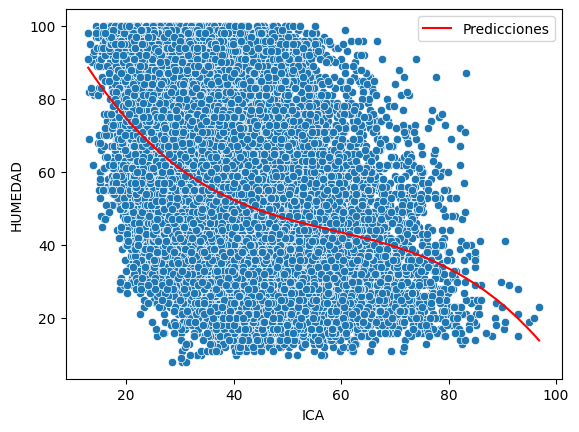

In [25]:
sns.scatterplot(data=df, x='ICA', y=df['HUMEDAD'])
sns.lineplot(x=df['ICA'], y=y_pred.flatten(), color='r', label='Predicciones')

In [ ]:
# Relación entre datos, utilizando, por ejemplo, los valores Max y Min de Temperatura

dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

# intentando solucionar el error 'str' no tiene atributo 'plot'